In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler


In [20]:
data = pd.read_csv('Matrix_Apr10.csv')

In [21]:
data.columns

Index(['postal_code', 'Years', 'useful', 'funny', 'cool', 'Price',
       'use_change', 'fun_change', 'coo_change', 'pri_change', 'use_median',
       'fun_median', 'coo_median', 'pri_median', 'use_std', 'fun_std',
       'coo_std', 'pri_std', 'stars_1', 'stars_2', 'stars_3', 'stars_4',
       'stars_5', 'Star1_change', 'Star2_change', 'Star3_change',
       'Star4_change', 'Star5_change', 'stars', 'sta_median', 'sta_std',
       'reviews_perc', 'prev_stars', 'Star_change', 'NumBsqft_Rev',
       'Bsqft_change', 't-1', 't-2', 'Y'],
      dtype='object')

In [86]:

data_threshold = np.mean(data.Y) - np.std(data.Y)
data_threshold

-0.0040787918057469535

C:\Users\jose oros\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


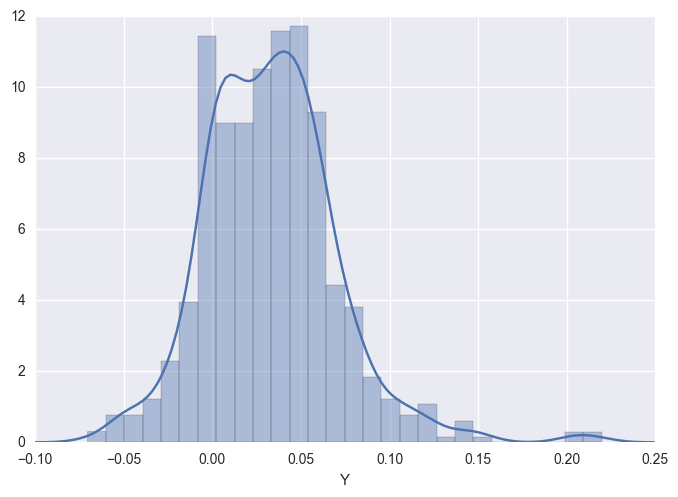

In [23]:
sns.distplot(data['Y'])
plt.show()

data['grow'] = np.where(data['Y'] <= np.mean(data.Y) - np.std(data.Y), "NEGATIVE", np.where(data['Y'] >= np.mean(data.Y) + np.std(data.Y), "HIGH_GROWTH", "NORMAL_GROWTH"))

In [25]:
data.head()

,postal_code,Years,useful,funny,cool,Price,use_change,fun_change,coo_change,pri_change,...,sta_std,reviews_perc,prev_stars,Star_change,NumBsqft_Rev,Bsqft_change,t-1,t-2,Y,grow
0,15003,2009,0.500,0.000,0.500000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.000553,4.500000,0.000000,0.307692,0.000000,-0.026316,0.000000,0.036036,NORMAL_GROWTH
1,15003,2010,1.625,0.375,0.375000,2.400000,2.250000,0.000000,-0.250000,0.200000,...,0.707107,0.001275,4.500000,-0.055556,0.923077,2.000000,0.036036,-0.026316,-0.060870,NEGATIVE
2,15003,2011,1.200,0.200,0.466667,2.400000,-0.261538,-0.466667,0.244444,0.000000,...,1.125463,0.001285,4.250000,0.050980,0.923077,0.000000,-0.060870,0.036036,0.027778,NORMAL_GROWTH
3,15003,2012,1.800,0.450,0.800000,2.111111,0.500000,1.250000,0.714286,-0.120370,...,1.490320,0.001196,4.466667,-0.171642,1.538462,0.666667,0.027778,-0.060870,0.027027,NORMAL_GROWTH
4,15003,2013,0.840,0.560,0.640000,1.888889,-0.533333,0.244444,-0.200000,-0.105263,...,1.320353,0.001188,3.700000,0.059459,1.692308,0.100000,0.027027,0.027778,0.000000,NORMAL_GROWTH


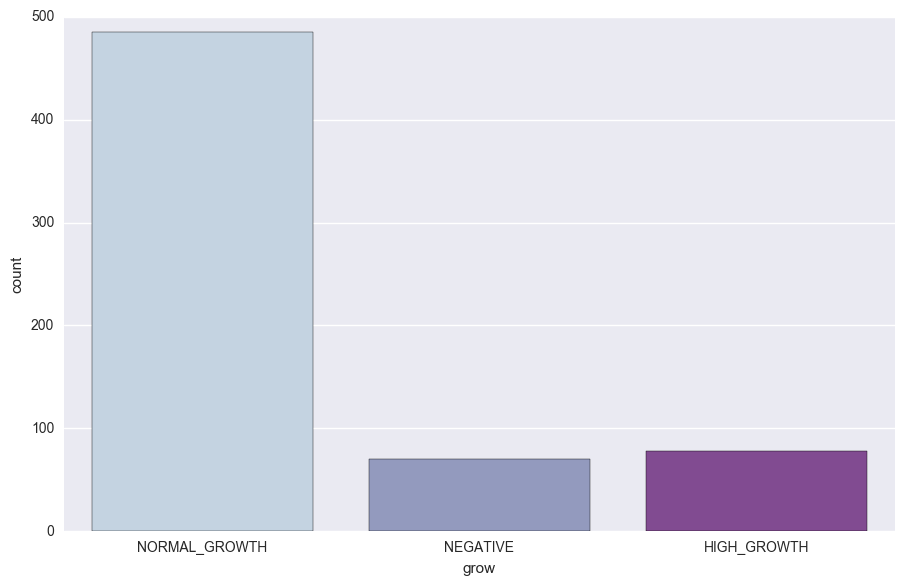

In [27]:
sns.factorplot(x="grow", data=data, kind="count",palette="BuPu", size=6, aspect=1.5)
plt.show()

In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
logreg = linear_model.LogisticRegression(C=1e5)

In [34]:
data2 = data

In [40]:
data2.columns[2:38]

Index(['useful', 'funny', 'cool', 'Price', 'use_change', 'fun_change',
       'coo_change', 'pri_change', 'use_median', 'fun_median', 'coo_median',
       'pri_median', 'use_std', 'fun_std', 'coo_std', 'pri_std', 'stars_1',
       'stars_2', 'stars_3', 'stars_4', 'stars_5', 'Star1_change',
       'Star2_change', 'Star3_change', 'Star4_change', 'Star5_change', 'stars',
       'sta_median', 'sta_std', 'reviews_perc', 'prev_stars', 'Star_change',
       'NumBsqft_Rev', 'Bsqft_change', 't-1', 't-2'],
      dtype='object')

In [120]:
#Create train and test data

X = data2[data2.columns[2:38]]
Y = data2['grow']

test_index = data2['Years']>=2014
train_index = data2['Years']<2014

In [121]:
#set training and test data with indexes as above
x_train = X[train_index]
y_train = Y[train_index]

x_test = X[test_index]
y_test = Y[test_index]

#x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

#Oversampling
#ros = RandomOverSampler()
#x_train, y_train = ros.fit_sample(x_train, y_train)

In [122]:
# we create an instance of logistic Classifier and fit the data.
logreg.fit(x_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [123]:
y_pred = logreg.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  4   3  52]
 [  0   0   0]
 [  5   1 191]]
               precision    recall  f1-score   support

  HIGH_GROWTH       0.44      0.07      0.12        59
     NEGATIVE       0.00      0.00      0.00         0
NORMAL_GROWTH       0.79      0.97      0.87       197

  avg / total       0.71      0.76      0.70       256



C:\Users\jose oros\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [125]:
#Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=7)
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[  4   3  52]
 [  0   0   0]
 [  9  25 163]]
               precision    recall  f1-score   support

  HIGH_GROWTH       0.31      0.07      0.11        59
     NEGATIVE       0.00      0.00      0.00         0
NORMAL_GROWTH       0.76      0.83      0.79       197

  avg / total       0.65      0.65      0.63       256



C:\Users\jose oros\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [119]:
#Random Forests
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
confusion_matrix(y_test, y_pred_rf)

               precision    recall  f1-score   support

  HIGH_GROWTH       0.00      0.00      0.00        71
     NEGATIVE       0.00      0.00      0.00         1
NORMAL_GROWTH       0.79      0.94      0.86       264

  avg / total       0.62      0.74      0.67       336



C:\Users\jose oros\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0,   5,  66],
       [  0,   0,   1],
       [  0,  15, 249]])

In [535]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X.columns
feature_importance = pd.DataFrame(columns = ['Feature', 'Importance'])
feature_importance['Feature'] = columns[indices]
feature_importance['Importance'] = importances[indices]
feature_importance

,Feature,Importance
0,Per_Change_t,0.106155
1,stars_3,0.090937
2,stars_1,0.089354
3,stars_5,0.081119
4,Perc_Change_tminus1,0.074637
5,funny,0.072942
6,stars_perc,0.072568
7,cool,0.066442
8,useful,0.062087
9,reviews_perc,0.060540


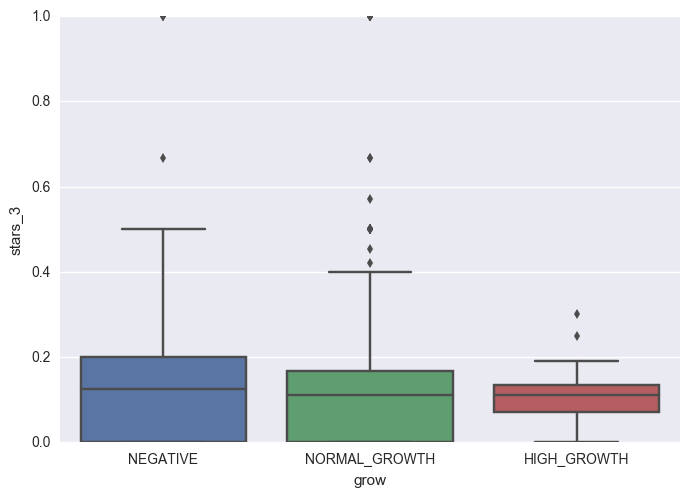

In [567]:
sns.boxplot(data=data, x='grow', y='stars_3')
plt.show()

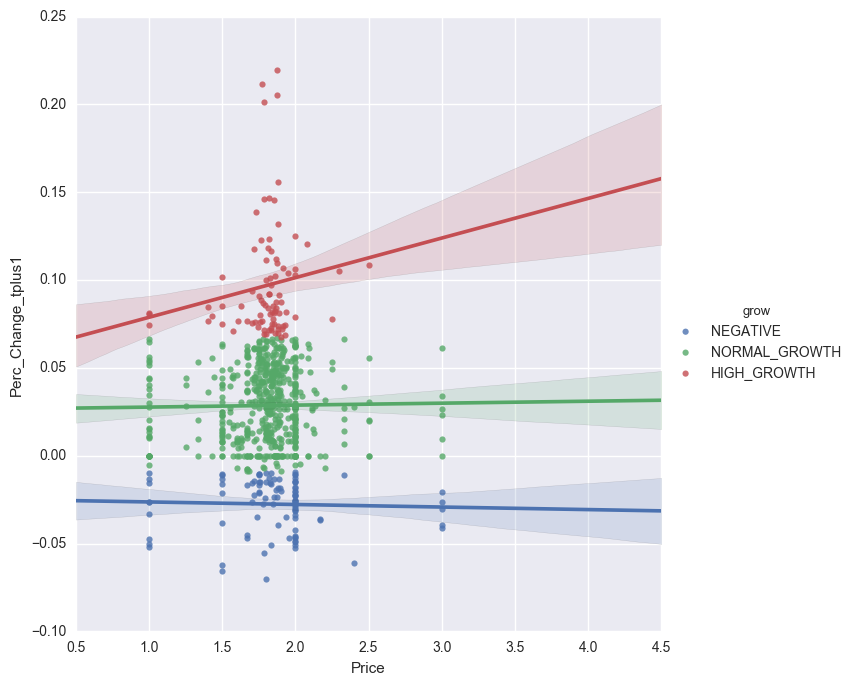

In [506]:
sns.lmplot(x="Price", y="Perc_Change_tplus1", hue="grow", data=data, size=7)
plt.show()

In [510]:
data2.dropna().describe()

,postal_code,Years,useful,funny,cool,Price,stars_1,stars_2,stars_3,stars_4,stars_5,stars,reviews_perc,prev_stars,stars_perc,Perc_Change_tminus1,Per_Change_t,Perc_Change_tplus1
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,15168.141956,2012.436909,1.068052,0.367989,0.494219,1.809474,0.107808,0.077899,0.126347,0.279289,0.408657,3.803087,0.012904,3.853074,0.011470,0.021715,0.028951,0.033083
std,78.916710,2.626868,0.644194,0.408243,0.455602,0.245240,0.109397,0.068017,0.101962,0.147775,0.185385,0.480138,0.025321,0.545036,0.272047,0.033733,0.039469,0.037433
min,15003.000000,2006.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000023,1.000000,-0.800000,-0.070423,-0.070423,-0.070423
25%,15112.000000,2011.000000,0.659720,0.130109,0.235667,1.730889,0.040000,0.022348,0.072646,0.206649,0.307692,3.576049,0.000979,3.582394,-0.062953,0.000000,0.000000,0.008066
50%,15203.000000,2013.000000,0.965546,0.268621,0.398269,1.833333,0.097365,0.076923,0.117963,0.269845,0.386917,3.765358,0.004124,3.781929,-0.001392,0.020135,0.027180,0.031458
75%,15224.000000,2015.000000,1.357578,0.461003,0.636162,1.918697,0.152098,0.107421,0.164725,0.334572,0.488815,4.000000,0.011989,4.063497,0.036462,0.044826,0.053044,0.053637
max,15367.000000,2016.000000,4.500000,3.000000,4.000000,3.000000,1.000000,0.555556,1.000000,1.000000,1.000000,5.000000,0.170306,5.000000,3.500000,0.201389,0.219858,0.219858


In [513]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data[data.columns[2:18]].dropna())

In [518]:
data_scaled_df = pd.DataFrame(data_scaled, columns = data.columns[2:18])
data_scaled_df['grow'] = data['grow']
data_scaled_df.describe()

,useful,funny,cool,Price,stars_1,stars_2,stars_3,stars_4,stars_5,stars,reviews_perc,prev_stars,stars_perc,Perc_Change_tminus1,Per_Change_t,Perc_Change_tplus1
count,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02,6.340000e+02
mean,-2.420076e-16,1.975286e-16,-8.195337e-17,-1.805076e-15,1.436811e-16,-9.105930e-18,3.051362e-17,-2.553163e-16,2.486619e-17,4.798125e-16,-1.978789e-17,9.456158e-17,-1.286917e-17,-3.344678e-17,3.817486e-17,-1.100592e-16
std,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00,1.000790e+00
min,-1.659276e+00,-9.021087e-01,-1.085616e+00,-3.303344e+00,-9.862550e-01,-1.146191e+00,-1.240137e+00,-1.891452e+00,-2.206102e+00,-5.842701e+00,-5.091441e-01,-5.238789e+00,-2.985186e+00,-2.733548e+00,-2.519712e+00,-2.767267e+00
25%,-6.343662e-01,-5.831529e-01,-5.679435e-01,-3.206933e-01,-6.203241e-01,-8.173614e-01,-5.270988e-01,-4.919474e-01,-5.450481e-01,-4.732337e-01,-4.713450e-01,-4.970187e-01,-2.737825e-01,-6.442484e-01,-7.340728e-01,-6.688387e-01
50%,-1.592484e-01,-2.435962e-01,-2.107666e-01,9.736494e-02,-9.553075e-02,-1.436619e-02,-8.229151e-02,-6.395851e-02,-1.173581e-01,-7.864188e-02,-3.470598e-01,-1.306345e-01,-4.731692e-02,-4.687817e-02,-4.489193e-02,-4.345896e-02
75%,4.497933e-01,2.280202e-01,3.117965e-01,4.457229e-01,4.051765e-01,4.343751e-01,3.766838e-01,3.743995e-01,4.327292e-01,4.104417e-01,-3.616928e-02,3.863781e-01,9.193770e-02,6.856611e-01,6.109193e-01,5.495122e-01
max,5.331714e+00,6.452261e+00,7.700911e+00,4.858357e+00,8.162018e+00,7.028098e+00,8.575165e+00,4.880934e+00,3.192324e+00,2.494822e+00,6.221228e+00,2.105976e+00,1.283339e+01,5.330567e+00,4.840669e+00,4.993513e+00


In [519]:
X = data_scaled_df[data_scaled_df.columns[0:14]]
Y = data_scaled_df['grow']

# x_train = X[train_index]
# y_train = Y[train_index]

# x_test = X[test_index]
# y_test = Y[test_index]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.5)

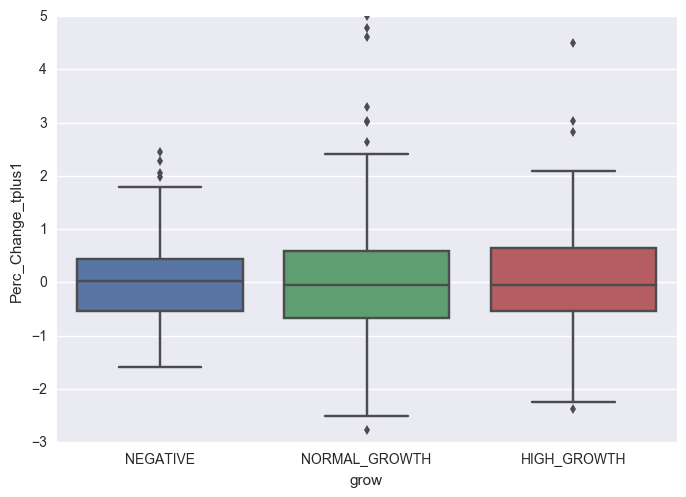

In [563]:
sns.boxplot(data=data_scaled_df, x='grow', y='Perc_Change_tplus1')
plt.show()

In [540]:
pd.concat([y_pred_lr, y_pred_dt, y_pred_rf], axis = 1)

TypeError: cannot concatenate a non-NDFrame object

In [544]:
from sklearn.ensemble import VotingClassifier

In [561]:
eclf1 = VotingClassifier(estimators=[('lr', logreg), ('rf', rf), ('dt', decision_tree)], voting='soft',weights=[10,10,1])
eclf1 = eclf1.fit(x_train, y_train)
y_pred_ensemble = eclf1.predict(x_test)
print(classification_report(y_test, y_pred_ensemble))
confusion_matrix(y_test, y_pred_ensemble)

               precision    recall  f1-score   support

  HIGH_GROWTH       0.26      0.37      0.31        38
     NEGATIVE       0.10      0.10      0.10        31
NORMAL_GROWTH       0.78      0.74      0.76       248

  avg / total       0.65      0.63      0.64       317



array([[ 14,   0,  24],
       [  1,   3,  27],
       [ 38,  27, 183]])

In [560]:
eclf1.classes_

array(['HIGH_GROWTH', 'NEGATIVE', 'NORMAL_GROWTH'], dtype=object)